# Projet de classification d'assurance automobile

Ce notebook suit les étapes typiques d'un projet de science des données :
1. Importation des données
2. Exploration et nettoyage
3. Préparation (encodage, normalisation)
4. Séparation train/test
5. Entraînement de modèles
6. Évaluation et comparaison
7. Sauvegarde du meilleur modèle

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import pickle

%matplotlib inline

## 1. Importation des données

In [3]:
df = pd.read_csv('car_insurance.csv.bck')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## 2. Exploration des données

- Vérification des valeurs manquantes
- Distribution des variables numériques

Valeurs manquantes par colonne :
id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


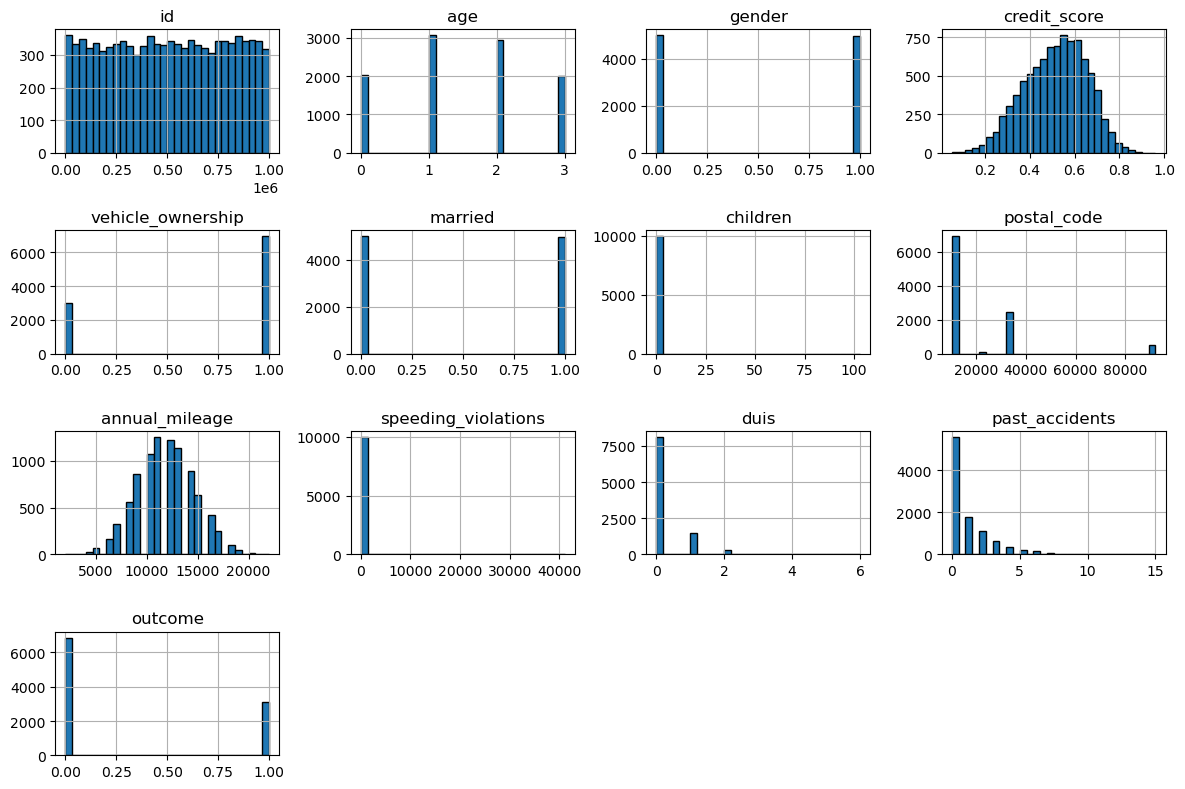

In [4]:
print('Valeurs manquantes par colonne :')
print(df.isna().sum())

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=30, figsize=(12, 8), edgecolor='black')
plt.tight_layout()

## 3. Nettoyage et préparation

### 3.1 Imputation des valeurs manquantes

In [7]:
df['credit_score'].fillna(df['credit_score'].median(), inplace=True)
df['annual_mileage'].fillna(df['annual_mileage'].median(), inplace=True)

### 3.2 Encodage des variables qualitatives

In [8]:
# LabelEncoder pour variables ordinales ou booléennes
le = LabelEncoder()
df['driving_experience'] = le.fit_transform(df['driving_experience'])
df['education'] = le.fit_transform(df['education'])
df['income'] = le.fit_transform(df['income'])
df['vehicle_year'] = le.fit_transform(df['vehicle_year'])
df['vehicle_type'] = le.fit_transform(df['vehicle_type'])

### 3.3 Sélection des variables et normalisation

In [9]:
X = df.drop(columns=['id', 'outcome', 'postal_code'])
y = df['outcome']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 4. Séparation train/test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)

## 5. Entraînement du modèle de régression logistique

In [11]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

## 6. Évaluation du modèle

In [12]:
y_pred = lr.predict(X_test)
print('Accuracy :', accuracy_score(y_test, y_pred))
print('Confusion Matrix :\n', confusion_matrix(y_test, y_pred))
print('Precision :', precision_score(y_test, y_pred))
print('Recall :', recall_score(y_test, y_pred))
print('F1 Score :', f1_score(y_test, y_pred))

Accuracy : 0.8453333333333334
Confusion Matrix :
 [[1857  206]
 [ 258  679]]
Precision : 0.7672316384180791
Recall : 0.7246531483457844
F1 Score : 0.7453347969264543


## 7. Validation croisée

In [13]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr, X_scaled, y, cv=cv)
print('Scores CV :', scores)
print('Moyenne CV :', scores.mean())

Scores CV : [0.845  0.8325 0.845  0.838  0.8415]
Moyenne CV : 0.8404


## 8. Comparaison avec d'autres classifieurs

In [14]:
models = {
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'Perceptron': Perceptron(max_iter=1000),
    'KNN': KNeighborsClassifier()
}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=cv)
    print(f"{name} CV moyenne : {cv_scores.mean():.4f}")

LogisticRegression CV moyenne : 0.8404
Perceptron CV moyenne : 0.7906
KNN CV moyenne : 0.8124


## 9. Sauvegarde du meilleur modèle

On sauvegarde le modèle de régression logistique.

In [16]:
with open('/home/mohamed/Documents/Cours/IMT/L1/INFO/datascience/LamPadou-Assurance/best_model.pkl', 'wb') as f:
    pickle.dump(lr, f)
print('Modèle sauvegardé dans best_model.pkl')

Modèle sauvegardé dans best_model.pkl
